In [1]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as selection
import imblearn.under_sampling as undersampling
import sklearn.feature_selection as feature_selection
import sklearn.linear_model as linear
import sklearn.ensemble as ensemble
import sklearn.metrics as metrics
import sklearn.neighbors as neighbors
import sklearn.tree as tree
import sklearn.decomposition as decomposition
import matplotlib.pyplot as plt
import sklearn.svm as svm
import sklearn.manifold as mnf
import imblearn.over_sampling as oversampling
from numpy.typing import *
from typing import *
from typing_extensions import Self

In [2]:
data_class = pd.read_csv("../preprocessed/classification_preprocessed.csv")
X_class = data_class.drop("Delay", axis=1)
Y_class = data_class.Delay
X_class, Y_class = undersampling.EditedNearestNeighbours(n_neighbors=5, n_jobs=-1).fit_resample(X_class, Y_class)
scaler = preprocessing.StandardScaler()
X_class = pd.DataFrame(scaler.fit_transform(X_class), columns=X_class.columns)

In [3]:
data_regression = pd.read_csv("../preprocessed/regression_preprocessed.csv")
X_reg = data_regression.drop("price", axis=1)
Y_reg = data_regression.price

## Классификация

In [4]:
def bagging_classification_test(X: NDArray, Y: NDArray) -> None:
    X_train, X_test, Y_train, Y_test = selection.train_test_split(X, Y, test_size=0.2, stratify=Y)
    boosting_classification_model = ensemble.BaggingClassifier(estimator=linear.LogisticRegressionCV(penalty="l2", cv=3)).fit(X_train, Y_train)
    boosting_classification_prediction = boosting_classification_model.predict(X_test)
    print(metrics.classification_report(Y_test, boosting_classification_prediction))

In [5]:
bagging_classification_test(X_class, Y_class)

              precision    recall  f1-score   support

           0       0.70      0.79      0.74     26078
           1       0.67      0.55      0.61     20042

    accuracy                           0.69     46120
   macro avg       0.69      0.67      0.67     46120
weighted avg       0.69      0.69      0.68     46120



In [6]:
variance_selector = feature_selection.VarianceThreshold(1)
X_class_vt = variance_selector.fit_transform(X_class)
print(f"{X_class.shape[1]} -> {X_class_vt.shape[1]}", variance_selector.get_feature_names_out(), sep="\n")

23 -> 11
['DayOfWeek' 'Time' 'Airline_AS' 'Airline_B6' 'Airline_CO' 'Airline_DL'
 'Airline_EV' 'Airline_F9' 'Airline_OH' 'Airline_UA' 'Airline_YV']


In [7]:
bagging_classification_test(X_class_vt, Y_class)

              precision    recall  f1-score   support

           0       0.66      0.76      0.70     26078
           1       0.61      0.49      0.54     20042

    accuracy                           0.64     46120
   macro avg       0.63      0.62      0.62     46120
weighted avg       0.64      0.64      0.63     46120



In [8]:
kbest_selector = feature_selection.SelectKBest()
X_class_kbest = kbest_selector.fit_transform(X_class, Y_class)
print(f"{X_class.shape[1]} -> {X_class_kbest.shape[1]}", kbest_selector.get_feature_names_out(), sep="\n")

23 -> 10
['Time' 'Length' 'Airline_CO' 'Airline_FL' 'Airline_MQ' 'Airline_OH'
 'Airline_UA' 'Airline_US' 'Airline_WN' 'Airline_YV']


In [9]:
bagging_classification_test(X_class_kbest, Y_class)

              precision    recall  f1-score   support

           0       0.69      0.78      0.73     26078
           1       0.66      0.54      0.59     20042

    accuracy                           0.68     46120
   macro avg       0.67      0.66      0.66     46120
weighted avg       0.67      0.68      0.67     46120



In [10]:
RFE_selector = feature_selection.RFECV(tree.DecisionTreeClassifier().fit(X_class, Y_class), min_features_to_select=5, cv=2)
X_class_RFE = RFE_selector.fit_transform(X_class, Y_class)
print(f"{X_class.shape[1]} -> {X_class_RFE.shape[1]}", RFE_selector.get_feature_names_out(), sep="\n")

23 -> 5
['Flight' 'Time' 'Length' 'Airline_WN' 'Route']


In [11]:
bagging_classification_test(X_class_RFE, Y_class)

              precision    recall  f1-score   support

           0       0.67      0.79      0.72     26078
           1       0.64      0.50      0.56     20042

    accuracy                           0.66     46120
   macro avg       0.66      0.64      0.64     46120
weighted avg       0.66      0.66      0.65     46120



In [12]:
pca_decomposer = decomposition.PCA(3)
X_class_PCA = pca_decomposer.fit_transform(X_class)
np.sum(pca_decomposer.explained_variance_ratio_)

0.20394107977527567

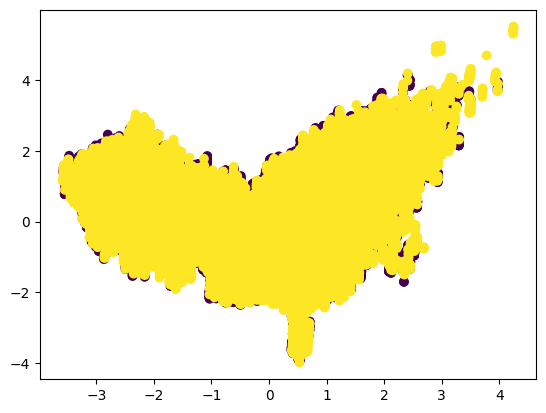

In [13]:
plt.scatter(X_class_PCA[:, 0], X_class_PCA[:, 1], c=Y_class);

In [14]:
bagging_classification_test(X_class_PCA, Y_class)

              precision    recall  f1-score   support

           0       0.64      0.82      0.72     26078
           1       0.63      0.39      0.48     20042

    accuracy                           0.63     46120
   macro avg       0.63      0.61      0.60     46120
weighted avg       0.63      0.63      0.61     46120



In [15]:
tsne_decomposer = mnf.TSNE(2, n_iter=250, n_jobs=-1)
indices = np.random.randint(0, X_class.shape[0], size=5000)
X_class_tsne = tsne_decomposer.fit_transform(X_class.to_numpy()[indices])

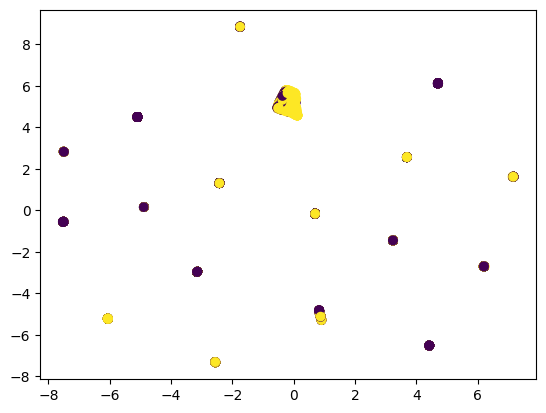

In [16]:
plt.scatter(X_class_tsne[:, 0], X_class_tsne[:, 1], c=Y_class[indices])

In [17]:
X_train, X_test, Y_train, Y_test = selection.train_test_split(X_class_tsne, Y_class[indices], test_size=0.2)
boosting_classification_model = ensemble.BaggingClassifier().fit(X_train, Y_train)
boosting_classification_prediction = boosting_classification_model.predict(X_test)
print(metrics.classification_report(Y_test, boosting_classification_prediction))

              precision    recall  f1-score   support

           0       0.63      0.73      0.67       563
           1       0.56      0.45      0.50       437

    accuracy                           0.61      1000
   macro avg       0.60      0.59      0.59      1000
weighted avg       0.60      0.61      0.60      1000



In [18]:
isomap_decomposer = mnf.Isomap(n_components=3, max_iter=1, n_jobs=-1)
indices = np.random.randint(0, X_class.shape[0], size=100)
isomap_decomposer.fit(X_class.iloc[indices])

/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:352: UserWarning: The number of connected components of the neighbors graph is 6 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure 

Isomap(max_iter=1, n_components=3, n_jobs=-1)

In [19]:
X_class_isomap = isomap_decomposer.transform(X_class)

In [20]:
X_train, X_test, Y_train, Y_test = selection.train_test_split(X_class_isomap, Y_class, test_size=0.2, stratify=Y_class)
boosting_classification_model = ensemble.StackingClassifier(estimators=[["tree", tree.DecisionTreeClassifier()], ["linear", linear.LogisticRegression("l2")]]).fit(X_train, Y_train)
boosting_classification_prediction = boosting_classification_model.predict(X_test)
print(metrics.classification_report(Y_test, boosting_classification_prediction))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82     26078
           1       0.80      0.67      0.73     20042

    accuracy                           0.78     46120
   macro avg       0.79      0.77      0.78     46120
weighted avg       0.79      0.78      0.78     46120



# Регрессия

In [21]:
def ridge_regression_test(X: NDArray, Y: NDArray) -> None:
    X_train, X_test, Y_train, Y_test = selection.train_test_split(X, Y, test_size=0.2)
    ridge_model = linear.RidgeCV(cv=2).fit(X_train, Y_train)
    prediction = ridge_model.predict(X_test)
    print(f"r2: {metrics.r2_score(Y_test, prediction)}",
          f"MAE: {metrics.mean_absolute_error(Y_test, prediction)}",
          f"max error: {metrics.max_error(Y_test, prediction)}",
          sep="\n")

In [22]:
ridge_regression_test(X_reg, Y_reg)

r2: 0.9221001886856968
MAE: 733.4832879732396
max error: 13902.46456889634


In [23]:
variance_selector = feature_selection.VarianceThreshold(0.2)
X_reg_vt = variance_selector.fit_transform(X_reg)
print(f"{X_reg.shape[1]} -> {X_reg_vt.shape[1]}", variance_selector.get_feature_names_out(), sep="\n")

22 -> 7
['carat' 'cut' 'depth' 'table' 'x' 'y' 'z']


In [24]:
ridge_regression_test(X_reg_vt, Y_reg)

r2: 0.8063606099725105
MAE: 906.4658749424457
max error: 81014.71145463595


In [25]:
kbest_selector = feature_selection.SelectKBest()
X_reg_kbest = kbest_selector.fit_transform(X_reg, Y_reg)
print(f"{X_reg.shape[1]} -> {X_reg_kbest.shape[1]}", kbest_selector.get_feature_names_out(), sep="\n")

22 -> 10
['carat' 'x' 'y' 'z' 'color_D' 'color_H' 'color_J' 'clarity_SI1'
 'clarity_SI2' 'clarity_VS2']


In [26]:
ridge_regression_test(X_reg_kbest, Y_reg)

r2: 0.88946302200554
MAE: 775.795653386795
max error: 18753.607194837452


In [27]:
RFE_selector = feature_selection.RFE(tree.DecisionTreeRegressor().fit(X_reg, Y_reg))
X_reg_RFE = RFE_selector.fit_transform(X_reg, Y_reg)
print(f"{X_reg.shape[1]} -> {X_reg_RFE.shape[1]}", RFE_selector.get_feature_names_out(), sep="\n")

22 -> 11
['carat' 'x' 'y' 'z' 'color_H' 'color_I' 'color_J' 'clarity_I1'
 'clarity_SI1' 'clarity_SI2' 'clarity_VS2']


In [28]:
ridge_regression_test(X_reg_RFE, Y_reg)

r2: 0.9155192809018472
MAE: 764.6678433701093
max error: 13803.71360445979


In [29]:
pca_decomposer = decomposition.PCA(10)
X_reg_PCA = pca_decomposer.fit_transform(X_reg)
np.sum(pca_decomposer.explained_variance_ratio_)

0.9565925643301042

In [30]:
ridge_regression_test(X_reg_PCA, Y_reg)

r2: 0.7693068494147878
MAE: 1302.6843015921459
max error: 67041.59252353704


In [31]:
tsne_decomposer = mnf.TSNE(2, n_iter=250, n_jobs=-1)
indices = np.random.randint(0, X_reg.shape[0], size=20000)
X_reg_tsne = tsne_decomposer.fit_transform(X_reg.iloc[indices])

In [32]:
X_train, X_test, Y_train, Y_test = selection.train_test_split(X_reg_tsne, Y_reg[indices], test_size=0.2)
ridge_model = ensemble.StackingRegressor(estimators=[["tree", tree.DecisionTreeRegressor()], ["linear", linear.RidgeCV()]]).fit(X_train, Y_train)
prediction = ridge_model.predict(X_test)
print(f"r2: {metrics.r2_score(Y_test, prediction)}",
      f"MAE: {metrics.mean_absolute_error(Y_test, prediction)}",
      f"max error: {metrics.max_error(Y_test, prediction)}",
      sep="\n")

r2: 0.7656730182901275
MAE: 1158.8347123240956
max error: 13898.297537479713


In [33]:
isomap_decomposer = mnf.Isomap(n_components=11, n_neighbors=15, n_jobs=-1)
indices = np.random.randint(0, X_reg.shape[0], size=5000)
isomap_decomposer.fit(X_reg.iloc[indices]);

In [34]:
X_reg_isomap = isomap_decomposer.transform(X_reg)

In [35]:
X_train, X_test, Y_train, Y_test = selection.train_test_split(X_reg_isomap, Y_reg, test_size=0.2)
ridge_model = ensemble.StackingRegressor(estimators=[["tree", tree.DecisionTreeRegressor()], ["linear", linear.LassoCV()]]).fit(X_train, Y_train)
prediction = ridge_model.predict(X_test)
print(f"r2: {metrics.r2_score(Y_test, prediction)}",
      f"MAE: {metrics.mean_absolute_error(Y_test, prediction)}",
      f"max error: {metrics.max_error(Y_test, prediction)}",
      sep="\n")

r2: 0.8643608996116903
MAE: 842.7819098464452
max error: 12931.499216672342


# Алгоритм PCA

In [36]:
from typing_extensions import Self


class PCA:
    def __init__(self, dimentions: int = 2) -> None:
        self._dimentions = dimentions
        self._projection_matrix: Optional[NDArray] = None
        self._X: Optional[NDArray] = None
    
    def fit(self, X: NDArray) -> Self:
        self._X = X
        covariance = np.cov(X.T)
        eigen_values, eigen_vectors = np.linalg.eig(covariance)
        indices = eigen_values.argsort()[::-1]
        eigen_values, eigen_vectors = eigen_values[indices], eigen_vectors[:, indices]
        self._projection_matrix = eigen_vectors[:, :self._dimentions]
        return self

    def transform(self, X: Optional[NDArray] = None) -> NDArray:
        if X is None:
            X = self._X
        X_transformed = X.dot(self._projection_matrix)
        return X_transformed

In [37]:
pca_decomposer = PCA(2)
X_class_2d_projection = pca_decomposer.fit(X_class.to_numpy()).transform()
X_class_2d_projection.shape

(230600, 2)

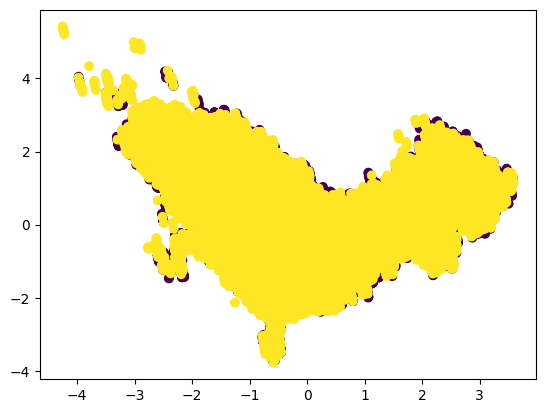

In [38]:
plt.scatter(X_class_2d_projection[:, 0], X_class_2d_projection[:, 1], c=Y_class);

# Кластеризация преобразованных данных

In [39]:
class KMeans:
    def __init__(self, clusters: int, initial_cluster_distribution=5, eps=1e-5) -> None:
        self._clusters = clusters
        self.centers: NDArray = None
        self._dimentions: int = None
        self._labels: NDArray | None = None
        self._stop_condition: bool
        self.X: NDArray = None
        self._eps = eps
        self._initial_cluster_distribution = initial_cluster_distribution

    def _euclidean_distance(self, point1: NDArray, point2: NDArray) -> float:
        return np.sqrt(np.sum((point1 - point2)**2))
    
    def _update_labels(self) -> None:
        labels = self.predict(self.X)
        self._labels = labels
    
    def _get_label(self, point: NDArray) -> int:
        return np.argmin(self._euclidean_distance(self.centers, point))

    def _get_centers_max_difference(self, centers: NDArray) -> float:
        return np.max([self._euclidean_distance(*pair) for pair in zip(self.centers, centers)])
    
    def _update_centers(self) -> None:
        new_centers = np.empty_like(self.centers)
        for i, center in enumerate(self.centers):
            cluster_points: NDArray = self.X[self._labels == i]
            new_centers[i] = np.mean(cluster_points, axis=0) if cluster_points.shape[0] > 0 else center
        if self._get_centers_max_difference(new_centers) < self._eps:
            self._stop_condition = True
        self.centers = new_centers
    
    def fit(self, X: NDArray, max_iterations: int = 100) -> Self:
        self.X = X
        self._stop_condition = False
        self._dimentions = X.shape[1]
        self.centers = np.random.uniform(-self._initial_cluster_distribution, self._initial_cluster_distribution, size=(self._clusters, self._dimentions))
        self._update_labels()
        i = 0
        while not self._stop_condition:
            self._update_centers()
            self._update_labels()
            i += 1
            if i >= max_iterations:
                self._stop_condition = True
        return self
    
    def predict(self, X: Optional[NDArray] = None) -> NDArray:
        if X is None:
            return self.labels
        prediction = np.apply_along_axis(lambda point: np.argmin([self._euclidean_distance(center, point) for center in self.centers]), axis=1, arr=self.X)
        return prediction
    
    @property
    def centroid_mean_square_distance(self) -> float:
        return np.power(np.apply_along_axis(lambda point: np.min([self._euclidean_distance(center, point) for center in self.centers]), axis=1, arr=self.X), 2).mean()
    
    @property
    def labels(self) -> NDArray:
        return self._labels
    
    @property
    def clusters(self) -> int:
        return self._clusters

In [40]:
kmeans_prediction = KMeans(2).fit(X_class_2d_projection).predict()

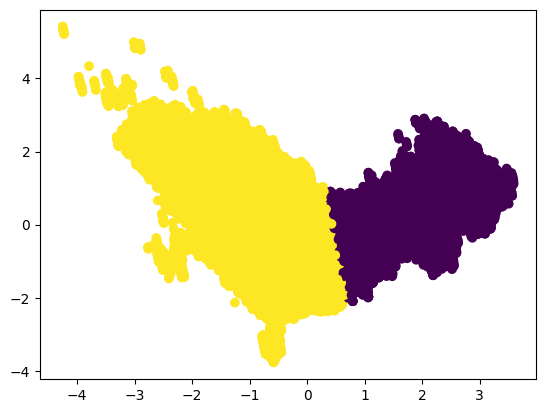

In [41]:
plt.scatter(X_class_2d_projection[:, 0], X_class_2d_projection[:, 1], c=kmeans_prediction);

## Тестируем линейную модель из ЛР 1

In [42]:
class LinearRegressionModel:
    def __init__(self, alpha: float, learning_rate=0.00004, iterations=20000) -> None:
        self._X: Optional[NDArray] = None
        self._Y: Optional[NDArray] = None
        self._alpha = alpha
        self._learning_rate = learning_rate
        self._iterations = iterations
    
    def fit(self, X: np.ndarray, Y: np.ndarray) -> Self:
        self._X = X
        self._Y = Y
        self._m, self._n = X.shape
        self._multipliers = np.full(shape=(self._n, 1), fill_value=0.)
        self._w0 = 0
        self._update()
        return self

    def _update(self) -> None:
        for i in range(1, self._iterations + 1):
            prediction = self.predict(self._X)

            weights_difference = (-(2 * (self._X.T).dot(self._Y - prediction)) + (2 * self._alpha * self._multipliers)) / self._m

            w0_difference = -2 * np.sum(self._Y - prediction) / self._m

            self._multipliers -= self._learning_rate * weights_difference
            self._w0 -= self._learning_rate * w0_difference
        return
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        return X.dot(self._multipliers)
    
    def get_metrics(self, X_test: np.ndarray, Y_actual: np.ndarray) -> dict[str, float]:
        prediction = self.predict(X_test)
        results = {
            "MAE": np.sum(np.abs(Y_actual - prediction)) / self._m,
            "MSE": np.sum((Y_actual - prediction)**2) / self._m,
            "MAPE": np.sum(np.abs((Y_actual - prediction) / Y_actual)) / self._m,
        }
        results.update({"RMSE": np.sqrt(results["MSE"])})
        results.update({"R2": 1 - self._m * results["MSE"] / np.sum((Y_actual - np.sum(Y_actual) / self._m)**2)})
        return results
    
    @property
    def multipliers(self) -> NDArray:
        return self._multipliers

In [43]:
linear_model = LinearRegressionModel(0.2).fit(X_reg.to_numpy(), Y_reg.to_numpy().reshape(-1, 1))

In [54]:
features_sorted_by_importance = np.argsort(np.abs(linear_model.multipliers), axis=0)[::-1]
print(*zip(X_reg.columns.to_numpy()[features_sorted_by_importance].tolist(), linear_model.multipliers[features_sorted_by_importance].tolist()[:5], strict=False), sep="\n")

(['x'], [[1256.5281661876065]])
(['y'], [[1163.1875503450608]])
(['z'], [[759.2034661421741]])
(['carat'], [[699.1124317832619]])
(['clarity_SI2'], [[-137.13476506274904]])
